# Exploratory Data Analysis

## A case study of SwiftMart Inc

## Step 1: Import necessary libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Import data

In [31]:
df_product = pd.read_csv("ShopEase Products.csv")
df_product.head()

,Product ID,Product Name,Category,Price,Stock
0,1,Laptop,Electronics,755.33,185
1,2,Smartphone,Electronics,1901.92,55
2,3,Tablet,Accessories,1466.67,52
3,4,Mouse,Accessories,1201.33,4
4,5,Keyboard,Accessories,320.48,43


In [9]:
df_sales = pd.read_csv("ShopEase Sales.csv")
df_sales.head()

,Customer ID,Product ID,Order Date,Region,Quantity Ordered,Product Name,Category,Price,Total Sales
0,1307,18,2022-10-08,North,2,Mousepad,Electronics,1054.27,2108.54
1,1340,18,2022-07-07,North,9,Mousepad,Electronics,1054.27,9488.43
2,1380,18,2022-06-15,East,7,Mousepad,Electronics,1054.27,7379.89
3,1009,18,2022-07-05,South,1,Mousepad,Electronics,1054.27,1054.27
4,1048,18,2022-02-21,East,3,Mousepad,Electronics,1054.27,3162.81


In [17]:
df_sales.describe()

,Customer ID,Product ID,Quantity Ordered,Price,Total Sales
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,1200.407250,10.669250,4.917750,927.625452,4540.21913
std,115.650744,5.736687,2.583535,597.643817,4084.85829
min,1001.000000,1.000000,1.000000,50.960000,50.96000
25%,1102.750000,6.000000,3.000000,374.970000,1466.67000
50%,1198.000000,11.000000,5.000000,869.570000,3077.20000
75%,1301.000000,16.000000,7.000000,1466.670000,6797.97000
max,1400.000000,20.000000,9.000000,1940.120000,17461.08000


In [19]:
df_sales.info

<bound method DataFrame.info of       Customer ID  Product ID  Order Date Region  Quantity Ordered  \
0            1307          18  2022-10-08  North                 2   
1            1340          18  2022-07-07  North                 9   
2            1380          18  2022-06-15   East                 7   
3            1009          18  2022-07-05  South                 1   
4            1048          18  2022-02-21   East                 3   
...           ...         ...         ...    ...               ...   
3995         1398          14  2022-09-12   East                 3   
3996         1234          14  2022-03-24  South                 1   
3997         1295          14  2022-02-14  North                 6   
3998         1074          14  2022-11-16   East                 3   
3999         1204          14  2022-04-06   West                 8   

     Product Name     Category    Price  Total Sales  
0        Mousepad  Electronics  1054.27      2108.54  
1        Mousepad

In [21]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer ID       4000 non-null   int64  
 1   Product ID        4000 non-null   int64  
 2   Order Date        4000 non-null   object 
 3   Region            4000 non-null   object 
 4   Quantity Ordered  4000 non-null   int64  
 5   Product Name      4000 non-null   object 
 6   Category          4000 non-null   object 
 7   Price             4000 non-null   float64
 8   Total Sales       4000 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 281.4+ KB


# Change order date from object data type to date data type (date-time)

In [28]:
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'])

In [30]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer ID       4000 non-null   int64         
 1   Product ID        4000 non-null   int64         
 2   Order Date        4000 non-null   datetime64[ns]
 3   Region            4000 non-null   object        
 4   Quantity Ordered  4000 non-null   int64         
 5   Product Name      4000 non-null   object        
 6   Category          4000 non-null   object        
 7   Price             4000 non-null   float64       
 8   Total Sales       4000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 281.4+ KB


# Visualizations

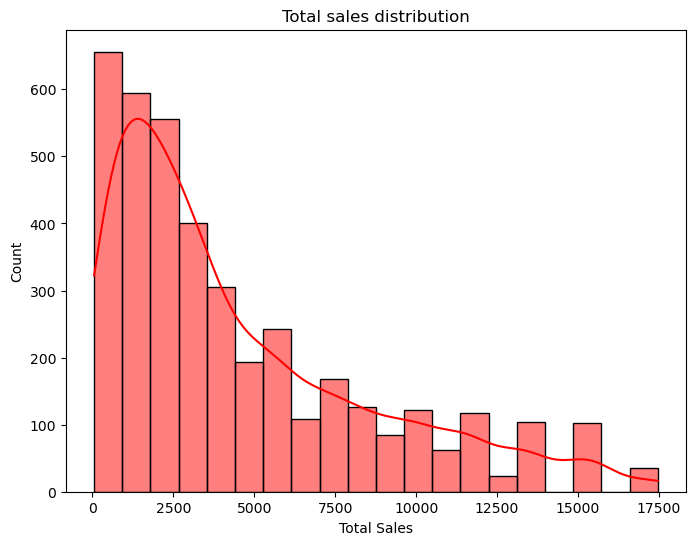

In [42]:
## the distribution of the total sales column

plt.figure(figsize=(8,6))
sns.histplot(df_sales['Total Sales'], bins = 20, kde = True, color = 'red')
plt.title('Total sales distribution')
plt.show()

In [46]:
# total number of region and their orders

df_sales["Region"].value_counts()

Region
West     1061
South    1011
North     974
East      954
Name: count, dtype: int64

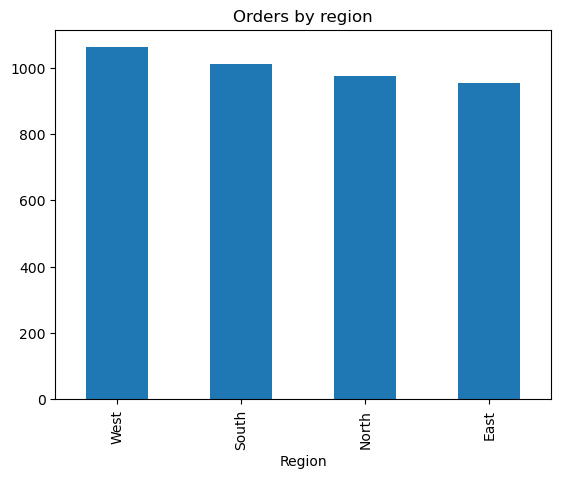

In [48]:
# Bar graph of orders by region
df_sales["Region"].value_counts().plot(kind='bar')
plt.title("Orders by region")
plt.show()

In [50]:
df_sales["Product Name"].value_counts()

Product Name
USB Cable              233
Smartwatch             222
Memory Card            216
Speakers               214
Power Bank             214
Mouse                  209
Mousepad               204
External Hard Drive    204
Laptop Stand           203
Monitor                200
Smartphone             197
Charger                194
Tablet                 194
HDMI Cable             193
Printer                192
Headphones             188
Keyboard               188
Webcam                 181
Router                 178
Laptop                 176
Name: count, dtype: int64

In [11]:
Total_sales = df_sales["Total Sales"].sum()
Total_sales

18160876.52

In [15]:
df_sales["Total Sales"].value_counts()

Total Sales
4999.68     36
1859.15     34
1230.88     33
2402.66     33
14999.04    32
            ..
13200.03    13
3618.66     13
203.84      13
2563.44     13
305.76      13
Name: count, Length: 180, dtype: int64

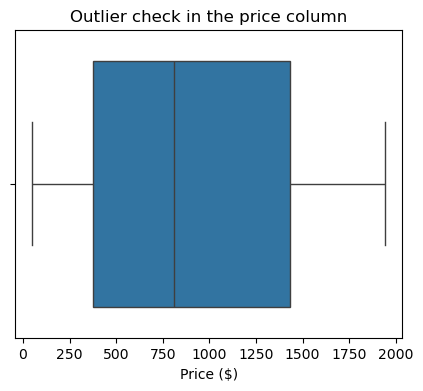

In [35]:
# outliers in price - box plot

plt.figure(figsize = (5,4))
sns.boxplot(data = df_product, x= "Price")
plt.title("Outlier check in the price column")
plt.xlabel("Price ($)")
plt.show()

In [43]:
# Total quanity of products ordered
Total_products = df_sales["Quantity Ordered"].sum()
Total_products


19671

In [51]:
# Average sales made 
Average_sales = df_sales["Total Sales"].mean()
print(f"The average sales for SwiftMart = ${Average_sales:.2f}")

The average sales for SwiftMart = $4540.22


## Bivariate Analysis

In [56]:
# Quantity sold by product
qty_product = df_sales.groupby("Product Name")["Quantity Ordered"].sum().sort_values(ascending = False)
qty_product

Product Name
USB Cable              1183
Power Bank             1089
Memory Card            1060
Speakers               1057
Smartwatch             1043
Mouse                  1037
Keyboard               1001
Smartphone              994
External Hard Drive     986
Laptop Stand            978
Charger                 974
Printer                 970
HDMI Cable              956
Mousepad                951
Webcam                  925
Tablet                  915
Router                  911
Monitor                 909
Laptop                  872
Headphones              860
Name: Quantity Ordered, dtype: int64

In [62]:
# total sales by region
Sales_region = df_sales.groupby("Region")["Total Sales"].sum()
Sales_region

Region
East     4213515.39
North    4539578.12
South    4551248.44
West     4856534.57
Name: Total Sales, dtype: float64